Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1]


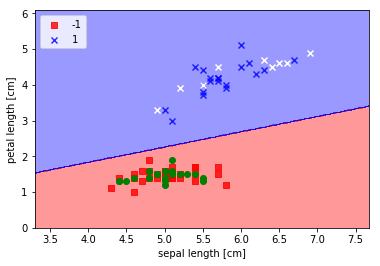

In [92]:
%matplotlib inline
%pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation#绘制动态图

class Perceptron(object):#定义感知机函数
   
    def __init__(self, eta,epoch):#只要初始化，不要返回值
        self.eta = eta
        self.epoch = epoch  # 迭代次数

    def fit(self, X, y):
       
        self.w_ = np.zeros(1 + X.shape[1])  # weights, 初始值0,多加一个w0
        self.loss_ = []#存放错分次数

        # 循环更新
        for _ in range(self.epoch):#range(start, stop[, step])从0开始，到self.epoch次结束，步长为1
            loss = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  #通过比较预测和真实数据矫正w
                self.w_[1:] += update * xi
                self.w_[0] += update
                loss += int(update != 0.0)
            self.loss_.append(loss)  # list.append(obj)，在list数组结尾添加对象
        return self

    def net_input(self, X):#根据输入数据代入公式
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):#与阀值比较进行预测
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
from matplotlib.colors import ListedColormap #用色块绘制分类边界
def plot_decision_regions(X, y, classifier, resolution=0.02):

        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))]) #np.unique 去除数组中的重复数字，排序之后输出

        # plot the decision surface 确定横纵轴边界
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # #X[:,k] 读取所有行第K列，最小-1, 最大+1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        #arange(start,end,step) 返回一个一维数组
        #meshgrid(x,y)产生一个以x为行，y为列的矩阵
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),#np.meshgrid()——生成网格点坐标矩阵
                         np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #调用predict()方法预测了grid矩阵当中的每一个点
        Z = Z.reshape(xx1.shape)#原数组重新组织

        # maps the different decision regions to different colors
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)#plt.contour画等高线
        plt.xlim(xx1.min(), xx1.max())#设定坐标上下限
        plt.ylim(xx2.min(), xx2.max())

        # plot class samples
        for idx, cl in enumerate(np.unique(y)):#numerate()将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标
             plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)




# 感知器类进行测试。
df = pd.read_csv('/home/zjr/下载/iris.data', header=None)
df.tail() 
#更改训练集
y1 = df.iloc[0:30, 4].values # .values将前30个样本值存进一个list中
x1 = df.iloc[0:30,[0,2]]
y2 = df.iloc[80:100, 4].values# .values将后20个样本值存进一个list中
x2 = df.iloc[80:100,[0,2]]
y = np.hstack((y1,y2)) # 沿着水平方向将数组堆叠起来。
X = np.vstack((x1,x2)) #沿着竖直方向将矩阵堆叠起来。
y = np.where(y=='Iris-setosa',-1,1) #如果是 Iris-setosa y=-1否则就是1 （二元分类）
X2 = df.iloc[30:60,[0,2]].values#取预测数据
ppn = Perceptron(eta=0.1,epoch=10)
ppn.fit(X, y) #训练
#预测
print(ppn.predict(X2))
plot_decision_regions(X,y,classifier=ppn)
plt.scatter(X2[0:20:,0], X2[0:20,1],color='g')
plt.scatter(X2[21:30:,0], X2[21:30,1],color='w',marker='x')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')


plt.show()

In [69]:
import numpy as np  
  
#example 1:  
data1=[[1,1,1],[1,1,1],[1,1,1]]  
arr2=np.array(data1)  
arr3=np.asarray(data1)  
data1[1][1]=2  
print ('data1:\n',data1)  
print ('arr2:\n',arr2 ) 
print ('arr3:\n',arr3 )

data1:
 [[1, 1, 1], [1, 2, 1], [1, 1, 1]]
arr2:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
arr3:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


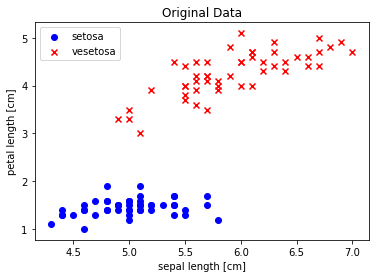

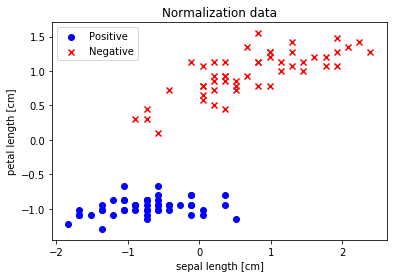

第 0次更新，分类错误的点个数： 5
第 1次更新，分类错误的点个数： 5
第 2次更新，分类错误的点个数： 4
第 3次更新，分类错误的点个数： 4
第 4次更新，分类错误的点个数： 3
第 5次更新，分类错误的点个数： 0


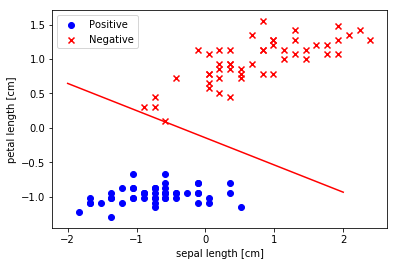

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/zjr/下载/iris.data', header=None)
df.tail() 
y = df.iloc[0:100, 4].values#读取前100行的序号为4（第5列数据）
y = np.where(y == 'Iris-setosa', -1, 1)#标签分类：如果是 Iris-setosa y=-1否则就是1 
#.iloc[0:100,[0:2]] 读取前100行的前两列的数据，即两特征值
X = df.iloc[0:100, [0, 2]].values
import matplotlib.pyplot as plt
#画散点图显示数据
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='vesetosa')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.title('Original Data')
plt.show()
#归一化处理
# 均值
#axis 不设置值，对 m*n 个数求均值，返回一个实数
#axis = 0：压缩行，对各列求均值，返回 1* n 矩阵
#axis =1 ：压缩列，对各行求均值，返回 m *1 矩阵

u = np.mean(X, axis=0)
# 方差
v = np.std(X, axis=0)

X = (X - u) / v

# 作图
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.title('Normalization data')
plt.show()

#直线初始化
# X加上偏置项
X = np.hstack((np.ones((X.shape[0],1)), X))#X.shape[0]为X第一维的长度，np.ones建立全1矩阵；hstack水平将两个数组水平组合
# 权重初始化，符合标准正态
w = np.random.randn(3,1)
s = np.dot(X, w)
y_pred = np.ones_like(y)    # 预测输出初始化，返回一个用1填充的跟输入形状和类型一致的数组
loc_n = np.where(s < 0)[0]   # 小于零索引下标，然后更新预测值
y_pred[loc_n] = -1
# 第一个分类错误的点
t = np.where(y != y_pred)[0][0]
# 更新权重w
eta=0.1
w += eta * ( y[t]- y_pred[t])* X[t, :].reshape((3,1))

for i in range(100):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    print('第%2d次更新，分类错误的点个数：%2d' % (i, num_fault))
    if num_fault == 0:
        break
    else:
        t = np.where(y != y_pred)[0][0]
        w += eta * ( y[t]- y_pred[t])* X[t, :].reshape((3,1))
# 通过循环获得成功分类的w，直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:50, 1], X[:50, 2], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 1], X[50:, 2], color='red', marker='x', label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()
